# Projek Data Science I : Telco Customer Churn


---

Perusahaan Telco atau Telekomunikasi saat ini sedang naik daun semenjak COVID-19 melanda dunia yang mengakibatkan perlunya akses internet untuk melanjutkan aktivitas-aktivitas penting seperti pembelajaran ataupun mengisi waktu luang di kesehariannya. Sering kita temui bahwa pelanggan perusahaan telekomunikasi tidak melanjutkan layanannya dikarenakan faktor-faktor seperti biaya ataupun penawaran dari perusahaan lainnya yang lebih baik. Hilangnya pelanggan-pelanggan ini dikenal sebagai istilah *customer churn*. Kini, perusahaan telekomunikasi ini akan mencari tahu apa yang membuat pelanggan cenderung untuk tidak melanjutkan layanannya. Pada kesempatan ini akan dilakukan analisis terhadap data yang diberikan yang dengan harapan dapat menjawab pertanyaan berikut:

* Apakah pelanggan dengan jumlah layanan yang banyak cenderung memiliki waktu tenure yang lama?
* Apakah pelanggan yang memiliki partner dan/atau dependent lebih cenderung memiliki tenure yang lama?
* Apakah pelanggan dengan biaya pelayanan yang tinggi memiliki waktu tenure yang lama?
* Manakah features yang berdampak pada *customer churn*?
* Apakah fitur yang ada dapat digunakan untuk memprediksi seorang pelanggan akan churn?


Keterangan Data :

* Pelanggan yang tidak berlangganan sejak sebulan lalu ada pada kolom churn 

* Terdapat beberapa servis/layanan untuk setiap pelanggan yakni pada kolom *phone*, *multiple lines*, *internet*, *online security*, *online backup*, *device protection*, *tech support*, dan *streaming TV and movies*

* Informasi akun pelanggan mengenai berapa lama mereka telah menjadi pelanggan, metode pembayaran, biaya bulanan dan biaya total 

* Demographic info about customers – gender, age range, and if they have partners and dependents

* Info demografik dari pelanggan mengenai jenis kelamin, jangkauan umur dan apabila mereka memiliki kawan atau sedang bergantung dengan orang tua atau tidak

## Bagian I : Import Data dan Cek Features Data

Untuk melakukan analisis data ini akan digunakan package-package sebagai berikut:

* **pandas** untuk meng-*import* dan memanipulasikan data
* **matplotlib.pyplot**, **plotly** dan **seaborn** untuk melakukan visualisasi data
* **numpy** untuk melakukan manipulasi array
* **sklearn** untuk melakukan proses Machine Learning pada data

### Bagian I.A Import Packages

In [ ]:
!pip install plotly
!pip install chart_studio

     |████████████████████████████████| 71kB 2.8MB/s 


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly.offline import iplot
import numpy as np
import seaborn as sns

In [ ]:
sns.set_style('whitegrid')
sns.color_palette("Set2")
plt.figure(figsize = (25,20))

<Figure size 1800x1440 with 0 Axes>

<Figure size 1800x1440 with 0 Axes>

### Bagian I.B : Import Data dan Cek kebenaran data

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/Andikazidanef15/demo/master/WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [ ]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,No,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [ ]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Lalu, definisikan kolom target dan kolom features. Dalam hal ini dapat kita bagi kolom features menjadi 3 yakni bagian servis, bagian identitas dan bagian akun pelanggan. Selain itu, karena kita lebih ingin tahu mengenai apakah pengguna ini menggunakan layanan secara keseluruhannya maka yang pelanggan yang memiliki layanan yang berbeda akan dianggap sama

In [ ]:
# Pembagian Kolom
target_column = 'Churn'
service_column = ['PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies']
identity_column = ['Partner','Dependents','gender']
user_account_column = ['Contract','PaperlessBilling','PaymentMethod']


In [ ]:
for service in service_column:
  print("Kolom {} :".format(service))
  print(df[service].unique())
  print("")

Kolom PhoneService :
['No' 'Yes']

Kolom MultipleLines :
['No phone service' 'No' 'Yes']

Kolom InternetService :
['DSL' 'Fiber optic' 'No']

Kolom OnlineSecurity :
['No' 'Yes' 'No internet service']

Kolom OnlineBackup :
['Yes' 'No' 'No internet service']

Kolom DeviceProtection :
['No' 'Yes' 'No internet service']

Kolom TechSupport :
['No' 'Yes' 'No internet service']

Kolom StreamingTV :
['No' 'Yes' 'No internet service']

Kolom StreamingMovies :
['No' 'Yes' 'No internet service']



kolom total charges seharusnya bertipe float karena ia adalah kolom numerik. Penting juga untuk mengecek ulang bahwa kolom total charge ini adalah hasil perkalian tenure (lama waktu (dalam bulan) pengguna menggunakan layanan telco) dengan monthly charge (biaya per bulan).

Features-features yang berisi nilai seperti "No" atau "No Internet Service" akan disamakan menjadi "No" (agar perhitungan untuk jumlah layanan yang pelanggan miliki menjadi lebih mudah) dan juga jika pelanggan tersebut memiliki layanan yang berbeda maka akan disamakan

Selain itu, features-features yang bersifat objek diubah menjadi kategorikal karena features-features ini melibatkan jawaban yang tidak random (seperti jenis layanan Internet dan Telepon). Features-features yang bersifat boolean (nilainya "Yes"/"No") akan diubah menjadi datatype boolean



In [ ]:
# Ubah tipe data TotalCharge dan pastikan nilainya benar
df['TotalCharges'] = '0'
df['TotalCharges'] = df['TotalCharges'].astype('float')
df['TotalCharges'] = df['tenure']*df['MonthlyCharges']

# Copy dataset untuk dijadikan analisis
df1 = df.copy()

# Samakan values No dan values layanan serta ubah tipe data
for column in service_column:
  for j in range(len(df1)):
    if df1[column][j] == 'No phone service' or df1[column][j] == 'No internet service':
      df1[column][j] = 'No'

for i in range(len(df1)):
  if df1['InternetService'][i] == 'DSL' or df1['InternetService'][i] == 'Fiber optic':
    df1['InternetService'][i] = 'Yes'




/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Tidak ada null values dan data telah diperbaiki sehingga siap untuk dilakukan analisis

## Bagian II :  Exploratory Data Analysis

Untuk menjawab pertanyaan-pertanyaan di atas penting untuk kita mengetahui seperti apa informasi yang dikandung oleh data ini beserta visualisasinya sehingga kita dapat menggunakan informasi tersebut untuk menjawab pertanyaan-pertanyaan di atas

### Apakah pelanggan dengan jumlah layanan yang banyak cenderung memiliki waktu tenure yang lama?

Hipotesis saya menyatakan bahwa pelanggan dengan layanan yang banyak akan cenderung untuk melanjutkan pelayanan dalam waktu (tenure) yang lebih lama dibandingkan dengan pelanggan yang memiliki sedikit layanan. Kita dapat menguji hipotesis ini dengan melakukan analisis data dan mengolah informasi tersebut menjadi visualisasi data yang dapat diambil kesimpulannya

Akan digunakan semua kolom data kecuali customerID karena customerID untuk tiap pelanggan unik sehingga tidak ada informasi yang bisa diperoleh darinya

In [ ]:
data = df1[df1.columns[1:]]

In [ ]:
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No,Yes,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,Yes,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1936.30,No
2,Male,0,No,No,2,Yes,No,Yes,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,107.70,Yes
3,Male,0,No,No,45,No,No,Yes,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1903.50,No
4,Female,0,No,No,2,Yes,No,Yes,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,141.40,Yes


Lalu, ubah value "Yes" menjadi 1 dan ubah value "No" menjadi 1. Hal ini dapat dilakukan dengan mengimport library distutils.util dan menggunakan fungsi strtobool untuk mengubah string Yes dan No menjadi 1 dan 0 berturut-turut

In [ ]:
import distutils
from distutils.util import strtobool

data['Churn_num'] = 0
for column in service_column:
  for j in range(len(df1)):
    data[column][j] = strtobool(data[column][j])
    data['Churn_num'][j] = strtobool(data['Churn'][j])



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Churn_num
0,Female,0,Yes,No,1,0,0,1,0,1,0,0,0,0,Month-to-month,Yes,Electronic check,29.85,29.85,No,0
1,Male,0,No,No,34,1,0,1,1,0,1,0,0,0,One year,No,Mailed check,56.95,1936.30,No,0
2,Male,0,No,No,2,1,0,1,1,1,0,0,0,0,Month-to-month,Yes,Mailed check,53.85,107.70,Yes,1
3,Male,0,No,No,45,0,0,1,1,0,1,1,0,0,One year,No,Bank transfer (automatic),42.30,1903.50,No,0
4,Female,0,No,No,2,1,0,1,0,0,0,0,0,0,Month-to-month,Yes,Electronic check,70.70,141.40,Yes,1


Valuenya sudah terubah. Jadi sekarang akan dilakukan pejumlahan di seccara mendatar (axis = 0) pada feature-feature service

In [ ]:
data['service_count'] = 0
for column in service_column:
  for j in range(len(data)):
    data['service_count'][j] += data[column][j]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
data['service_count']

0       2
1       4
2       4
3       4
4       2
       ..
7038    8
7039    7
7040    2
7041    3
7042    7
Name: service_count, Length: 7043, dtype: int64

Lalu, bagi menjadi 3 kuartil (kuartil bawah, tengah, atas) dari kolom service_count ini dan visualisasi terhadap waktu tenure dan juga jumlah churn

In [ ]:
data['service_category'] = pd.qcut(data['service_count'],3, labels = ['Sedikit','Sedang','Banyak'])

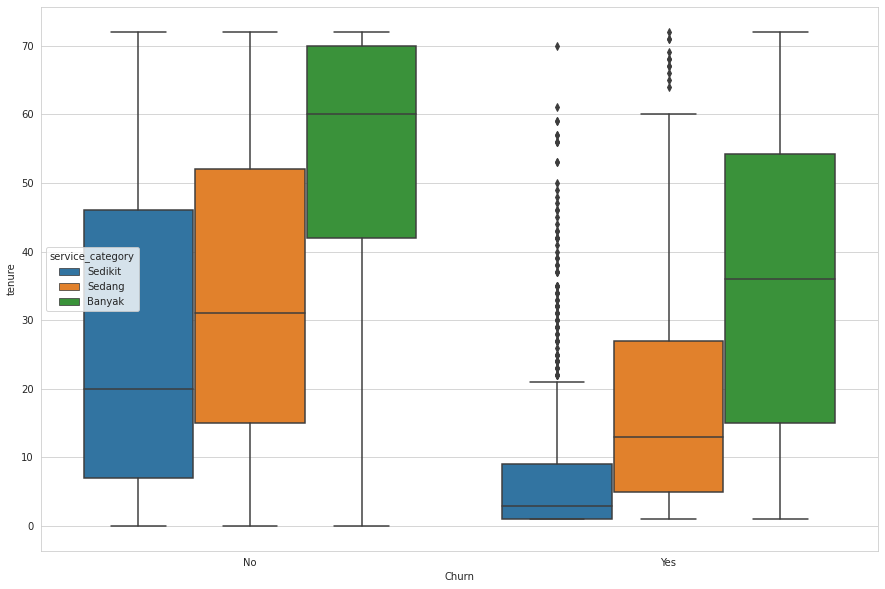

In [ ]:
plt.figure(figsize = (15,10))
sns.boxplot(x='Churn',y='tenure',hue = 'service_category', data = data)

Ternyata, banyaknya layanan pelanggan mempengaruhi lama pelanggan untuk tetap melanjutkan pelayanan atau tidak, pelanggan yang memiliki sedikit layanan memiliki mean tenure yang lebih rendah baik yang churn atau tidak dengan pelanggan yang memiliki banyak ataupun layanan yang sedang. Pelanggan yang memiliki banyak layanan cenderung memiliki tenure yang lebih lama dibanding yang lain baik yang churn ataupun tidak 

Perhatikan juga bahwa terdapat banyak pencilan di pelanggan yang churn dan memiliki sedikit layanan yang berarti bahwa meskipun pelanggan itu layanannya sedikit tetapi waktu (tenure) mereka dalam layanan lama sampai pada akhirnya pelanggan tersebut churn.

### Apakah pelanggan dengan partner/dependent cenderung untuk melanjutkan pelayanan?

Kadangkala jika kita awam terhadap layanan apa yang akan digunakan sering kali kita menanyakan rekan kita ataupun orang tua kita mengenai apa layanan yang seharusnya diambil. Hal ini tentu dapat mempengaruhi keputusan kita untuk tetap mengikuti layanannya atau tidak (meskipun karena kita awam kadang kita mungkin mencoba layanan baru).


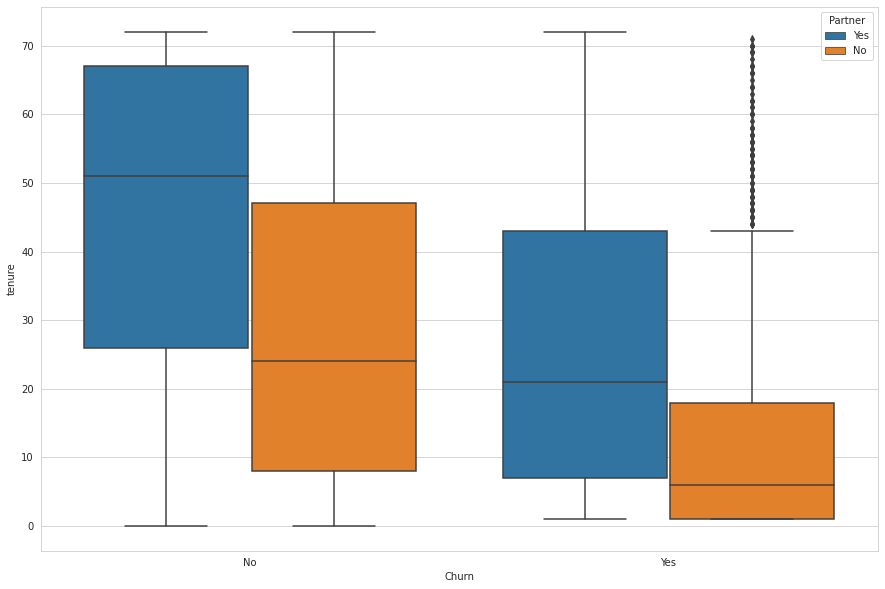

In [ ]:
plt.figure(figsize=(15,10))
sns.boxplot(x='Churn',y='tenure',hue='Partner',data=data)

Untuk pelanggan yang memiliki partner, rata-rata waktu tenurenya lebih pendek dibandingkan dengan waktu tenure pelanggan yang tidak memiliki partner.

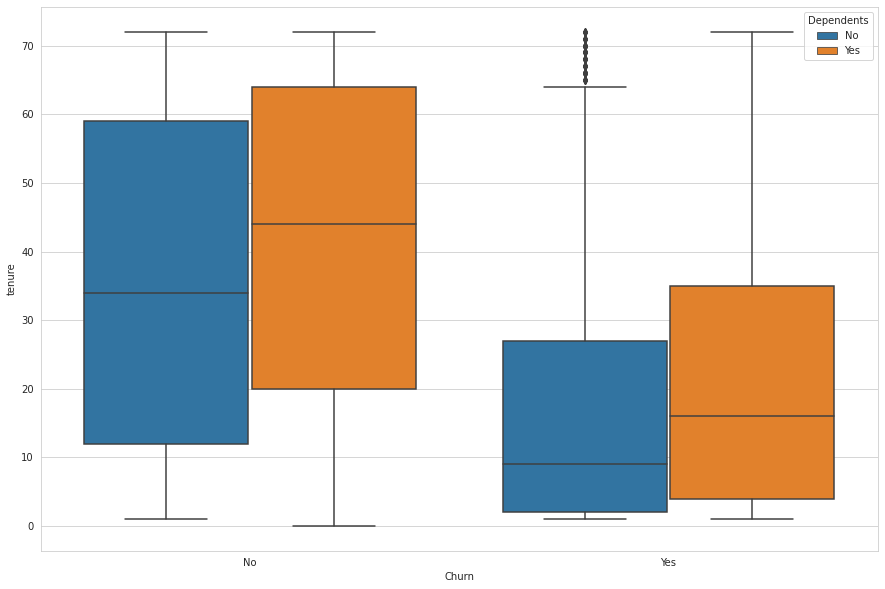

In [ ]:
plt.figure(figsize=(15,10))
sns.boxplot(x='Churn',y='tenure',hue='Dependents',data=data)

Sebaliknya, jika pelanggan tersebut dependents maka ada kecenderungan waktu tenure yang lebih lama dibandingkan dengan yang tidak. 

Lantas bagaimana dengan yang memiliki partner dan juga dependent? Untuk mendapatkannya kita harus menambahkan kolom baru mengenai True/False pelanggan tersebut memiliki partner dan dependent

In [ ]:
data['Partner & Dependents'] = ""
for i in range(len(data)):
  if data['Partner'][i] == 'Yes' and data['Dependents'][i] == 'Yes':
    data['Partner & Dependents'][i] = 'Yes'
  else:
    data['Partner & Dependents'][i] = 'No'

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



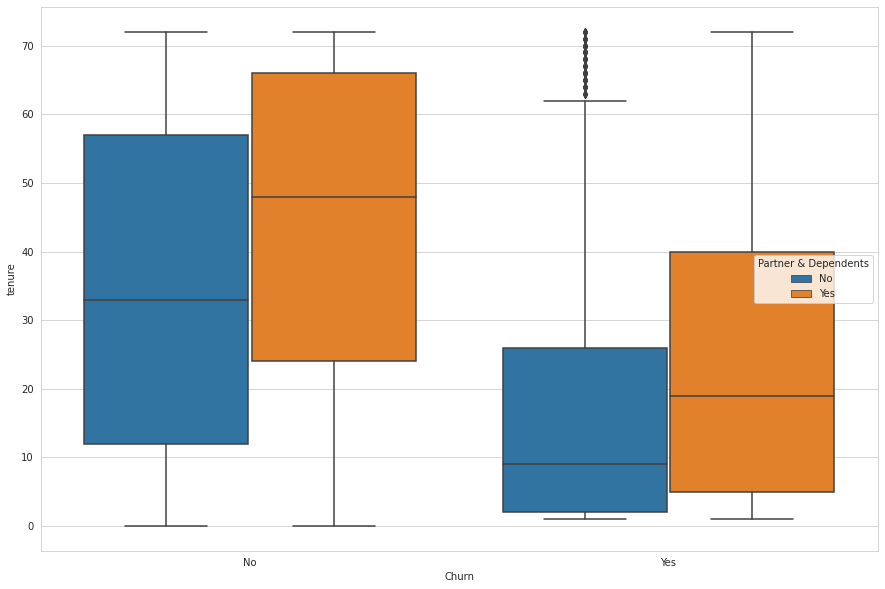

In [ ]:
plt.figure(figsize=(15,10))
sns.boxplot(x='Churn',y='tenure',hue='Partner & Dependents',data=data)

Ternyata jika pelanggan tersebut memiliki partner dan hidup bergantung maka ada kecenderungan waktu tenure pelanggan tersebut lebih lama dibandingkan dengan yang memiliki salah satunya atau tidak keduanya. Lalu, waktu tenure untuk pelanggan yang churn lebih rendah dibandingkan dengan yang tidak melakukan churn.

### Apakah pelanggan dengan biaya pelayanan yang tinggi cenderung memiliki waktu tenure yang lebih lama?

Kadangkala punya biaya yang besar membuat kita mempertimbangkan untuk tetap berlangganan pada layanan tersebut apalagi jika terdapat perusahaan lain yang menawarkan layanan yang lebih murah kita jadi lebih ingin untuk memutuskan layanan kita saat ini. Lalu, apakah tren yang sama juga berlaku pada data ini? Mari kita amati

Kita lihat fungsi distributif kumulatif besar TotalCharge pelanggan dengan plot

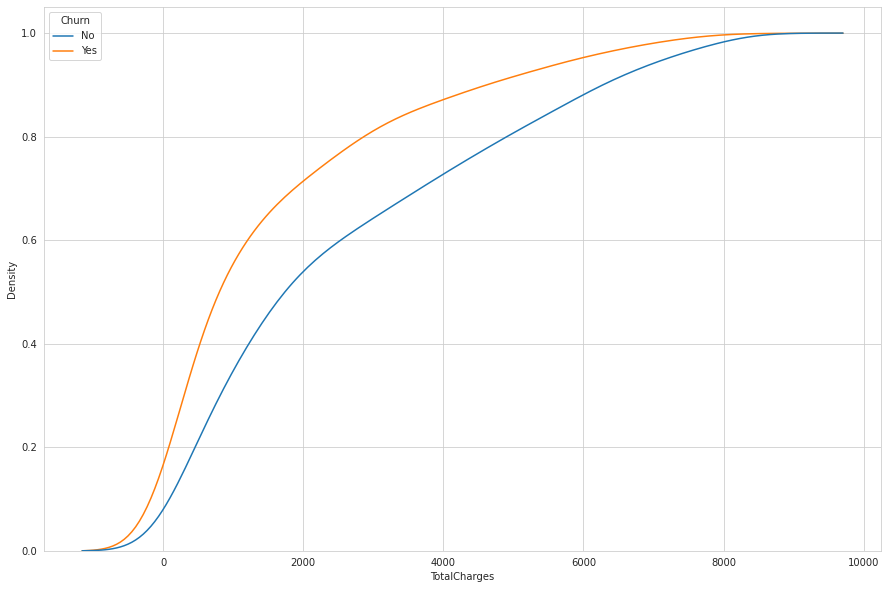

In [ ]:
plt.figure(figsize = (15,10))
sns.kdeplot(data = data, x = 'TotalCharges', hue = 'Churn',cumulative=True, common_norm=False, common_grid=True)

Terdapat 50% pelanggan yang tidak churn yang memiliki total biaya kurang dari $\$$ 2000 sementara terdapat sekitar 65% pelanggan yang churn yang memiliki total biaya kurang dari $\$$2000. Disini ada kecenderungan bahwa ada peluang yang lebih tinggi untuk biaya tertentu pada pelanggan yang churn dibandingkan dengan yang tidak (Ini karena jumlah pelanggan yang churn lebih sedikit dibanding dengan yang tidak, mengakibatkan peluang untuk pelanggan yang churn lebih tinggi dibandingkan dengan yang tidak).

Sekarang kita ingin melihat boxplot total charge dengan memperhatikan pelanggan yang churn dan yang tidak

In [ ]:
data['TotalCharges'].describe()

count    7043.000000
mean     2279.581350
std      2264.729447
min         0.000000
25%       394.000000
50%      1393.600000
75%      3786.100000
max      8550.000000
Name: TotalCharges, dtype: float64

Dari sini dapat dilihat quartil pertama, kedua dan ketiga serta nilai maksimum dari TotalCharge. Lalu, buat 1 feature tambahan untuk mengkategorikan TotalCharge masing-masing pelanggan

In [ ]:
data['TotalCharges_cat'] = pd.qcut(data['TotalCharges'], q = 4)

Buat boxplot mengenai waktu tenure dan kategori total charge

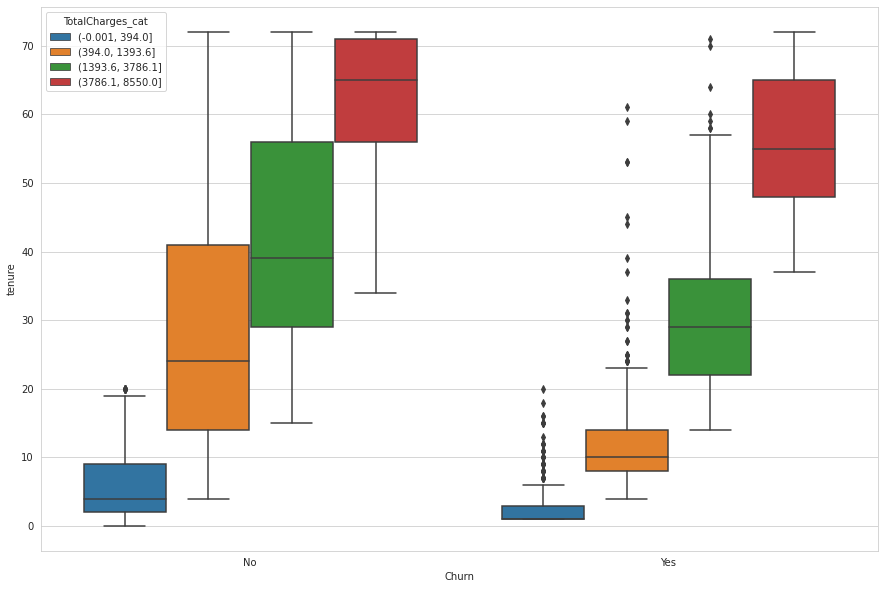

In [ ]:
plt.figure(figsize=(15,10))
sns.boxplot(x='Churn',y='tenure',hue='TotalCharges_cat',data=data)

Melihat tren dari dua boxplot sebelumnya, ternyata pelanggan dengan biaya antara $\$$3786 dan $\$$8550 memiliki waktu tenure yang paling lama dibandingkan dengan yang lain. Lalu, untuk pelanggan dengan biaya lebih rendah cenderung memiliki waktu tenure yang lebih pendek 

### Manakah features yang berdampak pada *customer churn*?

#### Korelasi antara Features lainnya dengan Churn
Disini akan ditentukan korelasi antara features lainnya dengan feature Churn yang akan menjadi target/ yang akan diprediksi pada model Machine Learning yang akan kita buat. Pertama-pertama perlu kita ubah kolom-kolom yang berdatatype object menjadi numerik agar dapat dibuat visualisasi scatter plot beserta besar korelasinya 

In [ ]:
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Churn_num,service_count,service_category,Partner & Dependents,TotalCharges_cat
0,Female,0,Yes,No,1,0,0,1,0,1,0,0,0,0,Month-to-month,Yes,Electronic check,29.85,29.85,No,0,2,Sedikit,No,"(-0.001, 394.0]"
1,Male,0,No,No,34,1,0,1,1,0,1,0,0,0,One year,No,Mailed check,56.95,1936.30,No,0,4,Sedang,No,"(1393.6, 3786.1]"
2,Male,0,No,No,2,1,0,1,1,1,0,0,0,0,Month-to-month,Yes,Mailed check,53.85,107.70,Yes,1,4,Sedang,No,"(-0.001, 394.0]"
3,Male,0,No,No,45,0,0,1,1,0,1,1,0,0,One year,No,Bank transfer (automatic),42.30,1903.50,No,0,4,Sedang,No,"(1393.6, 3786.1]"
4,Female,0,No,No,2,1,0,1,0,0,0,0,0,0,Month-to-month,Yes,Electronic check,70.70,141.40,Yes,1,2,Sedikit,No,"(-0.001, 394.0]"


In [ ]:
# Ubah kolom string menjadi numerik
data_numeric = pd.get_dummies(data, columns = ['gender','Contract','PaymentMethod'])

# Drop kolom-kolom yang tidak diperlukan
data_numeric.drop(columns=['Churn', 'TotalCharges_cat','service_category','Partner & Dependents'],axis = 1,inplace = True)

# Ubah value features Yes/No menjadi numerik
for column in ['Partner','Dependents','PaperlessBilling'] :
  for i in range(len(data_numeric)):
    if data_numeric[column][i] == 'Yes' :
      data_numeric[column][i] = 1
    else:
      data_numeric[column][i] = 0
  data_numeric[column] = data_numeric[column].astype('int64')
  
# Ubah datatype features servis menjadi int64
for column in service_column:
  data_numeric[column] = data_numeric[column].astype('int64')


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
data_numeric.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 27 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   SeniorCitizen                            7043 non-null   int64  
 1   Partner                                  7043 non-null   int64  
 2   Dependents                               7043 non-null   int64  
 3   tenure                                   7043 non-null   int64  
 4   PhoneService                             7043 non-null   int64  
 5   MultipleLines                            7043 non-null   int64  
 6   InternetService                          7043 non-null   int64  
 7   OnlineSecurity                           7043 non-null   int64  
 8   OnlineBackup                             7043 non-null   int64  
 9   DeviceProtection                         7043 non-null   int64  
 10  TechSupport                              7043 no

Setelah diubah features data menjadi numerik kita coba visualisasikan korelasi antara Churn dengan features lainnya

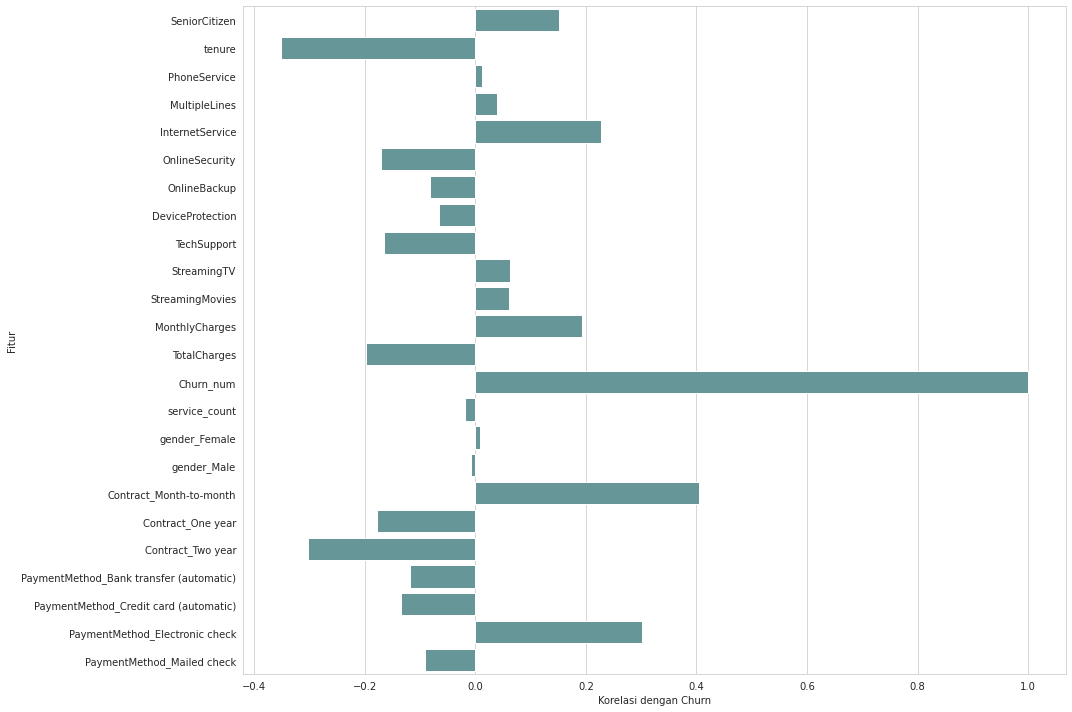

In [ ]:
# Hitung korelasi antar fitur
corr = data_numeric.corr()
col = np.array(corr.columns)

# Buat visualisasi bar plot
fig, ax = plt.subplots(figsize=(15,10), tight_layout=True)
sns.barplot(x = corr['Churn_num'], y = col, color = 'cadetblue')
plt.xlabel('Korelasi dengan Churn')
plt.ylabel('Fitur')
plt.show()

Dapat diamati bahwa features 'Contract Month to Month' dan 'PaymentMethod_Electronic check' berkorelasi positif dengan Churn secara signifikan. Sementara features 'Tenure', 'Contract_two_year' berkorelasi negatif dengan Churn. Fitur-fitur lain seperti 'MonthlyCharges', 'StramingMovies' dan layanan lainnya turut berkorelasi positif ataupun negatif dengan kolom Churn.

Dari sini fitur yang paling berdampak diperoleh dari metode pembayaran, lama waktu kontrak dan diikuti oleh layanan-layanan lainnya.

## Bagian III: Machine Learning

Disini akan kita gunakan metode Machine Learning yakni KNeighborsClassifiers, Logistic Regression, SVM, Random Forest, Adaboost dan XGB Classifier untuk menguji manakah di antara keempat tersebut yang menghasilkan performa terbaik dalam memprediksi label. 

#### Features dan Labels

##### Semua Features Identitas, Fasilitas, Akun Pengguna
Disini akan digunakan data numerik yang telah kita olah sebelumnya tapi perlu ada yang dirubah dtype kolom object menjadi kolom numeric

In [ ]:
data_train = data_numeric

In [ ]:
data_train.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn_num,service_count,gender_Female,gender_Male,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,0,1,0,0,1,0,1,0,0,0,0,1,29.85,29.85,0,2,1,0,1,0,0,0,0,1,0
1,0,0,0,34,1,0,1,1,0,1,0,0,0,0,56.95,1936.30,0,4,0,1,0,1,0,0,0,0,1
2,0,0,0,2,1,0,1,1,1,0,0,0,0,1,53.85,107.70,1,4,0,1,1,0,0,0,0,0,1
3,0,0,0,45,0,0,1,1,0,1,1,0,0,0,42.30,1903.50,0,4,0,1,0,1,0,1,0,0,0
4,0,0,0,2,1,0,1,0,0,0,0,0,0,1,70.70,141.40,1,2,1,0,1,0,0,0,0,1,0


In [ ]:
X = data_train.drop(columns=['Churn_num'])
y = data_train['Churn_num']

# Print Shape
print('Shape Feature Columns: ',X.shape)
print('Shape Target Columns: ', y.shape)

Shape Feature Columns:  (7043, 26)
Shape Target Columns:  (7043,)


#### Training-Test Dataset

Akan digunakan test size sebesar 0.3 dan training size dengan ukuran 0.7

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline

# Splitting X dan y
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 672)

# Print Shape
print('Shape X_train: ',X_train.shape)
print('Shape y_train: ', y_train.shape)
print('Shape X_test: ', X_test.shape)
print('Shape y_test: ', y_test.shape)


Shape X_train:  (4930, 26)
Shape y_train:  (4930,)
Shape X_test:  (2113, 26)
Shape y_test:  (2113,)


#### Using The Classifiers

Sebelumnya, akan dibuat fungsi untuk menghitung accuracy, precision, f1_score dan recall

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
models = XGBClassifier()
models.fit(X_train,y_train)
y_pred = models.predict(X_test)
mat = confusion_matrix(y_test,y_pred)

mat[0][0]
print(mat)

[[1390  154]
 [ 274  295]]


In [ ]:
def accuracy(conf_matrix):
  ''' Fungsi ini digunakan untuk menentukan nilai akurasi dari prediksi model ML '''
  # Definisikan variabel 
  true_positive = conf_matrix[0][0]
  false_negative = conf_matrix[0][1]
  false_positive = conf_matrix[1][0]
  true_negative = conf_matrix[1][1]

  # Hitung accuracy score
  accuracy = (true_positive + true_negative)/(true_positive + true_negative + false_positive + false_negative)
  
  return accuracy

def precision(conf_matrix):
  ''' Fungsi ini digunakan untuk menentukan nilai precision dari prediksi model ML '''
   # Definisikan variabel 
  true_positive = conf_matrix[0][0]
  false_negative = conf_matrix[0][1]
  false_positive = conf_matrix[1][0]
  true_negative = conf_matrix[1][1]

  # Hitung precision score
  precision = (true_positive)/(true_positive + false_positive)
  
  return precision

def recall(conf_matrix):
  ''' Fungsi ini digunakan untuk menentukan nilai recall dari prediksi model ML '''

   # Definisikan variabel 
  true_positive = conf_matrix[0][0]
  false_negative = conf_matrix[0][1]
  false_positive = conf_matrix[1][0]
  true_negative = conf_matrix[1][1]

  # Hitung recall score
  recall = (true_positive)/(true_positive + true_negative)

  return recall

def f1(conf_matrix):
  ''' Fungsi ini digunakan untuk menentukan nilai f1 dari prediksi model ML '''

  # Hitung recall score
  f1 = 2- ((precision(conf_matrix)*recall(conf_matrix))/(precision(conf_matrix) + recall(conf_matrix)))

  return f1

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Panggil classifier
classifier = [KNeighborsClassifier(), SVC(), LogisticRegression(max_iter = 500), RandomForestClassifier(),AdaBoostClassifier(),XGBClassifier()]

# Buat array yang akan diisi oleh skor masing-masing model classifier
training_accuracy = []
testing_accuracy = []
accuracy_score = []
precision_score = []
recall_score = []
f1_score = []

for i in range(len(classifier)):
  model = classifier[i]
  model.fit(X_train,y_train)
  y_pred = model.predict(X_test)
  conf_matrix = confusion_matrix(y_test,y_pred)

  # Tambahkan setiap skor ke array yang telah disediakan
  training_accuracy.append(model.score(X_train, y_train))
  testing_accuracy.append(model.score(X_test, y_test))

  accuracy_score.append(accuracy(conf_matrix))
  precision_score.append(precision(conf_matrix))
  recall_score.append(recall(conf_matrix))
  f1_score.append(f1(conf_matrix))


In [ ]:
data_class = {'Model':['K-Nearest Neighbors (KNN)', 'Support Vector Machine (SVM)', 'Logistic Regression', 'Random Forest','Adaptive Boosting (Adaboost)','Extreme Gradient Boosting (XGB)'], 'Training Accuracy':training_accuracy, 'Testing Accuracy':testing_accuracy, 
              'Accuracy Score':accuracy_score, 'Precision Score':precision_score, 'Recall Score':recall_score, 'F1 Score':f1_score}
data_class = pd.DataFrame(data_class)

In [ ]:
data_class

,Model,Training Accuracy,Testing Accuracy,Accuracy Score,Precision Score,Recall Score,F1 Score
0,K-Nearest Neighbors (KNN),0.832860,0.760057,0.760057,0.814052,0.836862,1.587350
1,Support Vector Machine (SVM),0.736308,0.730715,0.730715,0.730715,1.000000,1.577796
2,Logistic Regression,0.808722,0.798391,0.798391,0.835938,0.824541,1.584900
3,Random Forest,0.997972,0.785140,0.785140,0.821344,0.839662,1.584799
4,Adaptive Boosting (Adaboost),0.808925,0.795551,0.795551,0.832934,0.827484,1.584900
5,Extreme Gradient Boosting (XGB),0.824949,0.797444,0.797444,0.835337,0.824926,1.584951


Jika dilihat, skor akurasi training tertinggi diperoleh dengan model Random Forest Classifier sebesar 99% sementara testing accuracynya mencapai angka 78.5%, jauh berbeda dengan skor trainingnya. Khawatirnya, model mengalami overfitting tetapi dengan menggunakan feature engineering performa model bisa diperbaiki. Adapun model ML yang paling stabil adalah menggunakan Logistic Regression, Adaboost Classifier atau XGB Classifier karena perbedaan yang sedikit antara skor training dan skor testing. Jika dilihat dari skor accuracy, precision, dan F1_score, Logistic Regression memiliki performa yang paling baik.

## Bagian  Tambahan : Eksplorasi Data

### Bagian II.B Visualisasi Data

Pada bagian ini akan dilakukan visualisasi data yang dibagi kepada tiga kategori yakni identitas pengguna, fasilitas dan akun pengguna.

#### Identitas Pengguna

In [ ]:
identitas_pengguna = df.iloc[:,1:6]
identitas_pengguna.head()

##### Gender dan SeniorCitizen

In [ ]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

# Declare "fig" as subplots
fig = make_subplots(rows = 1, cols = 2, subplot_titles = ("Gender","Senior Citizen","Partner","Dependent","Tenure"), specs=[[{"type": "pie"}, {"type": "pie"}]])

# Make subplots for each categories
fig.add_trace(go.Pie(labels = identitas_pengguna['gender'], values = identitas_pengguna['gender'].value_counts()), row = 1, col = 1)
fig.add_trace(go.Pie(labels = ['No','Yes'], values = identitas_pengguna['SeniorCitizen'].value_counts()), row = 1, col = 2)
fig.show()

Jumlah kelamin perempuan dan laki-laki hampir sama, jadi data yang akan kita gunakan representatif terhadap kelamin.

Terdapat perbandingan 1:5 antara pengguna yang merupakan SeniorCitizen (Pelanggan yang sudah pensiun dan penghidupannya berasal dari uang pensiun) terhadap pengguna yang bukan merupakan SeniorCitizen.

##### Partner and Dependent

In [ ]:
print(identitas_pengguna['Partner'].value_counts())

print(identitas_pengguna['Dependents'].value_counts())

In [ ]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

# Declare "fig" as subplots
fig = make_subplots(rows = 1, cols = 2, subplot_titles = ("Partner","Dependent"), specs=[[{"type": "bar"}, {"type": "bar"}]])

# Make subplots for each categories
colors = ['maroon','blue']
fig.add_trace(go.Bar(x = ['No','Yes'], y = identitas_pengguna['Partner'].value_counts(), marker_color = colors), row = 1, col = 1)
fig.add_trace(go.Bar(x = identitas_pengguna['Dependents'].unique(), y = identitas_pengguna['Dependents'].value_counts(), marker_color = colors), row = 1, col = 2)

fig.show()

Ada sedikit perbedaan antara pelanggan yang memiliki partner dengan yang tidak sementara, ada perbedaan yang besar antara pengguna yang hidup bergantung dengan yang tidak bergantung pada siapapun

Lalu, berikutnya akan dilihat persentase pengguna yang memiliki partner dan dependen, salah satunya dan yang tidak. Misalkan,

* "Yes" - jika pelanggan memiliki partner dan dependent
* "Partial" - Jika pelanggan memiliki salah satunya
* "No" - Jika pelanggan tidak memiliki keduanya

In [ ]:
df['Partner & Dependent'] = ""

In [ ]:
for i in range(len(df)):
  if df.iloc[i, 3] == 'Yes' and df.iloc[i,4] == 'Yes':
    df['Partner & Dependent'][i] = 'Yes'
  elif df.iloc[i, 3] == 'No' and df.iloc[i, 4] == 'No':
    df['Partner & Dependent'][i] = 'No'
  else:
    df['Partner & Dependent'][i] = 'Partial'

In [ ]:
df['Partner & Dependent'].value_counts()

In [ ]:
x=['No', 'Partial', 'Yes']

fig = go.Figure(data=[
    go.Pie(name='Partner and Dependent?', labels=x, values=df['Partner & Dependent'].value_counts())])

fig.show()

Sebagian besar dari pelanggan ternyata tidak memiliki keduanya, lalu Lebih lanjut lagi, kita dapat melihat apakah SeniorCitizen ini memiliki partner dan dependen serta apa pengaruhnya terhadap tenure 

In [ ]:
fig = plt.figure(figsize = (15,10))
sns.barplot(x = 'SeniorCitizen', y = 'tenure', hue = 'Partner & Dependent', data = df)

Dapat diamati bahwa baik yang SeniorCitizen ataupun yang tidak ternyata lebih cenderung memiliki total tenure yang lebih lama jika ia memiliki partner dan bergantung dibanding dengan yang tidak ataupun yang salah satunya.

##### Tenure

In [ ]:
sns.distplot(df['tenure'])

In [ ]:
import plotly.figure_factory as ff
import numpy as np

np.random.seed(1)

x = identitas_pengguna['tenure']
hist_data = [x]
group_labels = ['distplot'] # name of the dataset

fig = ff.create_distplot(hist_data, group_labels)
fig.show()

Dapat diamati bahwa distribusi cenderung menceng ke arah kanan (skew to the right) namun terdapat puncak kedua yang berada di sekitar 60 - 70. Ini berarti bahwa ada lebih banyak orang yang berlangganan/tenure dalam waktu sebentar sekitar 0-10 bulan dan orang yang berlangganan/tenure dalam waktu lama sekitar 60 - 70 bulan.

#### Fasilitas

##### PhoneService 

In [ ]:
sns.countplot(x='PhoneService',data=df)

Ada perbandingan yang jauh drastis antara pengguna yang menggunakan layanan telepon dengan yang tidak

##### MultipleLines

In [ ]:
sns.countplot(x='MultipleLines',data = df)

Pengguna yang berlangganan layanan telepon tetapi tidak menggunakan fasilitas multiplelines lebih banyak daripada pengguna yang menggunakan fasilitas multiplelines

##### InternetService

In [ ]:
sns.countplot(x='InternetService',data=df)

Pengguna Fiber optic mendominasi pengguna DSL, lalu jumlah pengguna yang tidak menggunakan layanan Internet juga cukup banyak

##### OnlineSecurity

In [ ]:
sns.countplot(x='OnlineSecurity',data=df)

Meskipun keamanan saat beronline itu penting, pengguna yang tidak menggunakan Online Security lebih banyak daripada pengguna yang menggunakan Online Security

##### Online Backup

In [ ]:
sns.countplot(x='OnlineBackup',data=df)

Sama seperti kasus sebelumnya, pengguna yang tidak menggunakan layanan Online Backup lebih banyak daripada pengguna yang menggunakan layanan Online Backup 

##### DeviceProtection

In [ ]:
sns.countplot(x='DeviceProtection',data=df)

Pengguna yang tidak menggunakan layanan DeviceProtection juga lebih banyak daripada yang menggunakan layanan DeviceProtection

##### TechSupport

In [ ]:
sns.countplot(x='TechSupport',data=df)

Pengguna yang tidak menggunakan layanan TechSupport juga lebih banyak daripada pengguna yang menggunakan layanan TechSupport

##### StreamingTV

In [ ]:
sns.countplot(x='StreamingTV',data=df)

Kini, pengguna yang menggunakan layanan StreamingTV hampir menyamai jumlah pengguna yang tidak menggunakan layanan StreamingTV 

##### StreamingMovies

In [ ]:
sns.countplot(x='StreamingMovies',data=df)

Ini juga sama pengguna yang menggunakan layanan StreamingMovies hampir menyamai jumlah pengguna yang tidak menggunakan layanan tersebut

#### Akun Pengguna

##### Contract

In [ ]:
sns.countplot(df['Contract'])

Pengguna yang berlangganan secara bulanan adalah yang paling banyak, diikuti dengan pengguna yang berlangganan 2 tahun dan yang berlangganan secara 1 tahun.  

##### Paperless Billing

In [ ]:
sns.countplot(df['PaperlessBilling'])

Pengguna yang menggunakan paperless biling lebih banyak daripada yang tidak

##### Payment Method

In [ ]:
plt.figure(figsize=(15,10))
sns.countplot(df['PaymentMethod'])

Pengguna dengan electronic check paling banyak dibandingkan dengan yang lain

##### TotalCharges

In [ ]:
sns.distplot(df['TotalCharges'])

Distribusi untuk total biaya pengguna cenderung menceng kanan (skew to the right), mayoritas pengguna lebih banyak memiliki total biaya yang kurang dari rata-rata

##### Churn Customers

In [ ]:
sns.countplot(df['Churn'])

Lebih banyak pengguna yang tidak churn daripada yang churn